In [6]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [7]:
img = cv2.imread('lenna.png',0)
edges100 = cv2.Canny(img,100,100)
edges200 = cv2.Canny(img,200,200)
edges = cv2.Canny(img,100,200)

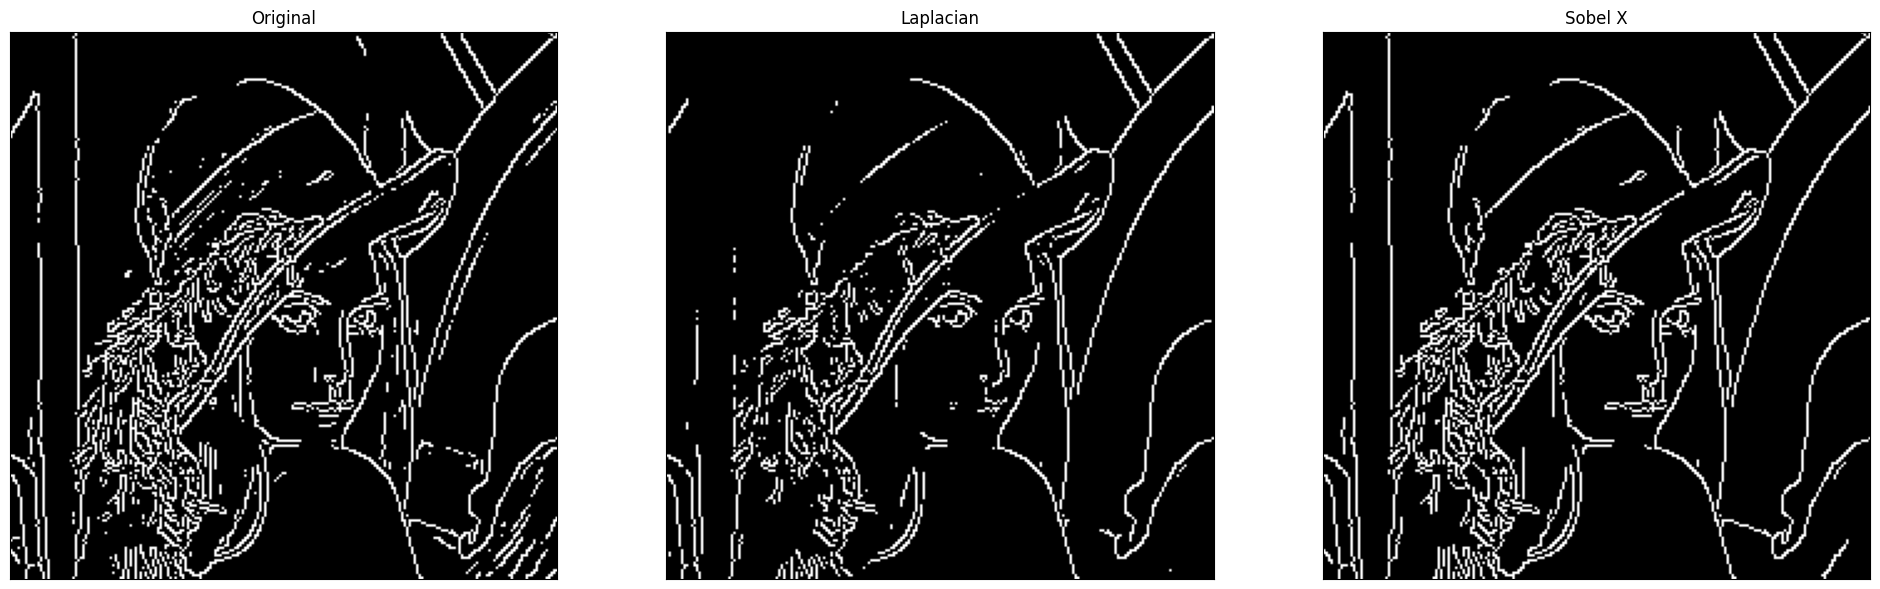

In [8]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(edges100,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges200,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


In [10]:
im = cv2.imread('woman-hand-palm-25848097.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,230,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

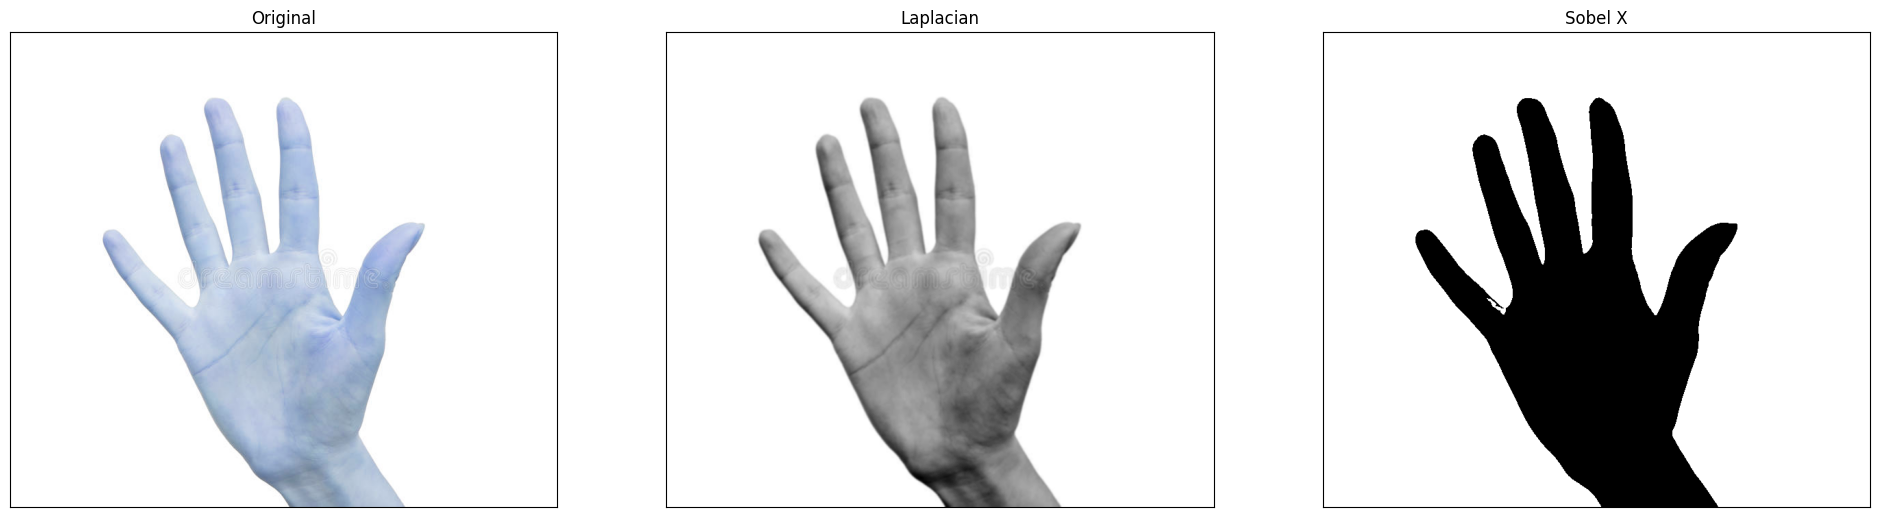

In [11]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
kernel7 = np.ones((7,7),np.uint8)
erosion = cv2.erode(thresh, kernel5, iterations = 1)
#dilation = cv2.dilate(thresh, kernel5, iterations = 1)
#closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel5)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel5)


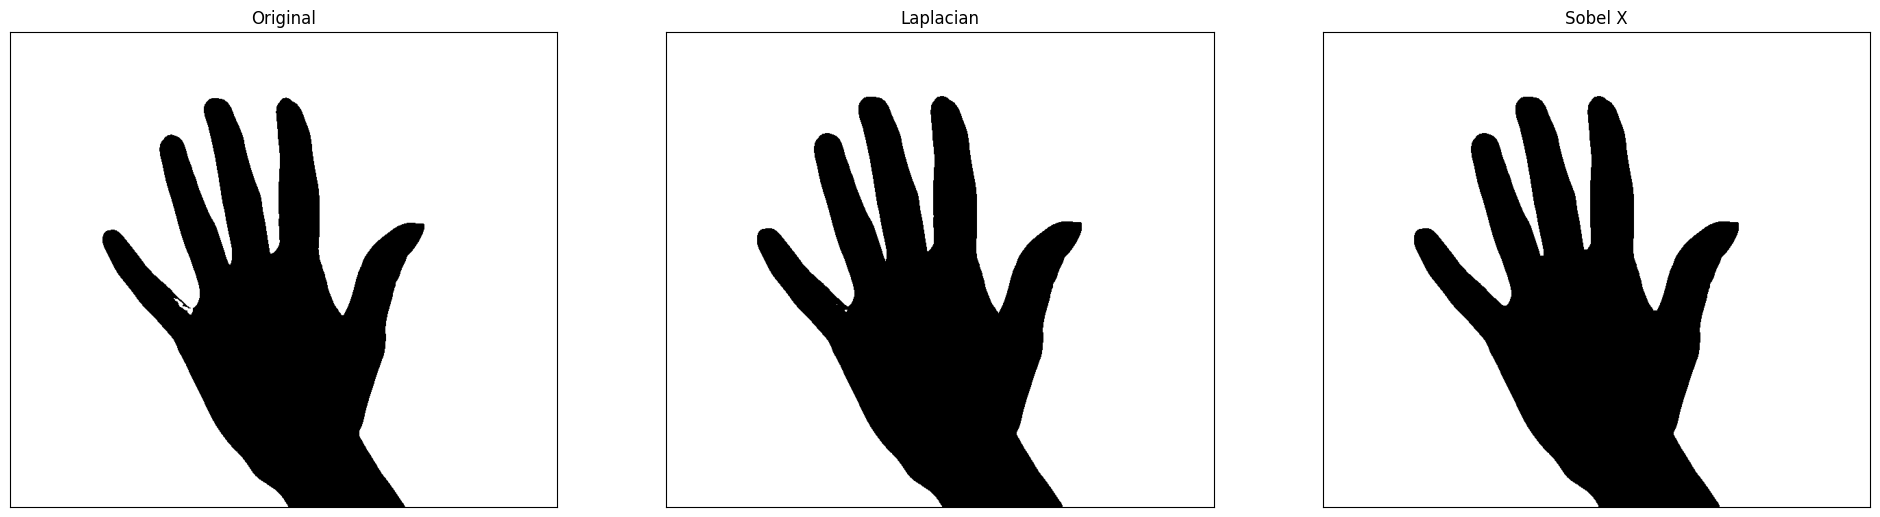

In [15]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(erosion,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 0, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 1, (0,255,0), 3)


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2526: error: (-215:Assertion failed) 0 <= contourIdx && contourIdx < (int)last in function 'cv::drawContours'


NameError: name 'img0' is not defined

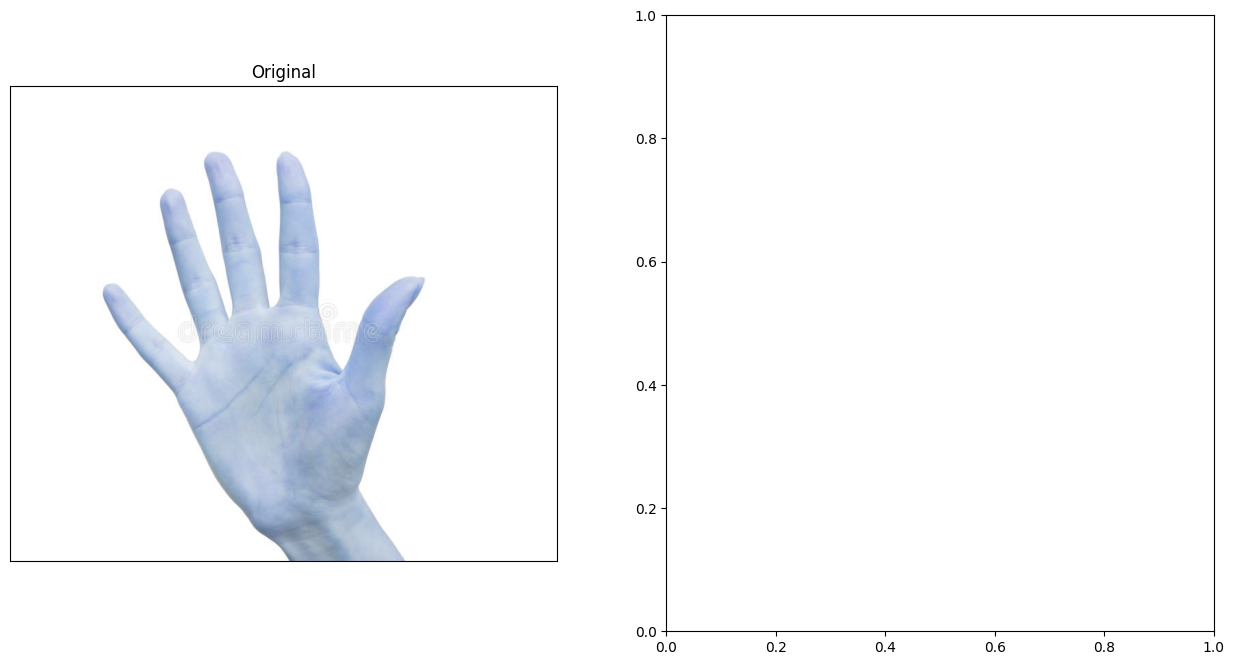

In [16]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

img1 = cv2.circle(img1,(cx,cy),5,(0,0,255),-1)
img2 = im.copy()
img2 = cv2.drawContours(img2, approx, -1, (0,0,255), 3)

NameError: name 'contours' is not defined

In [1]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'plt' is not defined